# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

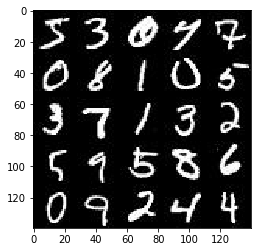

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

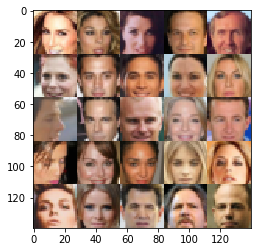

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0


C:\Users\Michael\AppData\Local\conda\conda\envs\kerasenv1\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels))
    inputs_z = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return (inputs_real, inputs_z, learning_rate)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [17]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        
        # NEW: 28x28x3
        
        alpha = 0.2
        nodes = int(256)
        
        x1 = tf.layers.conv2d(images, int(nodes/4), 5, strides=1, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        # NEW: 14x14x64
        # NEW: 28x28x64
        
        x2 = tf.layers.conv2d(relu1, int(nodes/2), 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        # NEW: 7x7x128
        # NEW: 14x14x128
        
        x3 = tf.layers.conv2d(relu2, int(nodes), 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        # NEW: 7x7x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, int(7*7*nodes)))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [16]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    # MOD: Modify dimensions to fit 28x28x3 in output
    
#    alpha = 0.2
#    reuse = False
    nodes = int(512)
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
#        x1 = tf.layers.dense(z, 7*7*128)
        x1 = tf.layers.dense(z, 7*7*nodes)
        
        # Reshape it to start the convolutional stack
#        x1 = tf.reshape(x1, (-1,7, 7, 128))
        x1 = tf.reshape(x1, (-1,7, 7, int(nodes)))
        
#        print(x1.shape)
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
        # 4x4x512 now
        # 7*7*256 now
        
        
        x2 = tf.layers.conv2d_transpose(x1, int(nodes/2), 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        # 8x8x256 now
        # 14*14*128 now
        
        x3 = tf.layers.conv2d_transpose(x2, int(nodes/4), 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
        # 16x16x128 now
        # 28*28*64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 32x32x3 now
        # 28*28*3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [18]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function

    alpha = 0.2
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)#, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)#, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [19]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)   
    
    return (d_train_opt, g_train_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#    saver = tf.train.Saver()
#    sample_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

    samples, losses = [], []
    steps = 0
    
    channels = 1 if data_image_mode == "L" else 3
#    print(np.ndim(data_shape))
    print(channels)

#   input_real, input_z, learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
#                print(np.ndim(batch_images))
#                print(np.amax(batch_images[1]))
#                print(np.amax(batch_images[2]))
#                print(np.amax(batch_images[3]))
#                print(np.amax(batch_images[4]))
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images *2


                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
#                    train_loss_d = d_loss.eval({net.input_z: batch_z, net.input_real: batch_images})
#                    train_loss_g = g_loss.eval({net.input_z: batch_z})

                    
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z}) 
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                    
                    
                if steps % 100 == 0:                    
                    show_generator_output(sess, 5, input_z, channels, data_image_mode)
                    
                    
                    
                    
#                    gen_samples = sess.run(
#                                   generator(net.input_z, 3, reuse=True, training=False),
#                                   feed_dict={net.input_z: sample_z})
#                    samples.append(gen_samples)
#                    _ = view_samples(-1, samples, 6, 12, figsize=figsize)
#                    plt.show()

#        saver.save(sess, './checkpoints/generator.ckpt')

#    with open('samples.pkl', 'wb') as f:
#        pkl.dump(samples, f)
    
    return losses #, samples        
        
        

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

1
Epoch 1/2... Discriminator Loss: 0.3520... Generator Loss: 5.2523
Epoch 1/2... Discriminator Loss: 0.3711... Generator Loss: 3.9414
Epoch 1/2... Discriminator Loss: 0.4035... Generator Loss: 6.9737
Epoch 1/2... Discriminator Loss: 0.5682... Generator Loss: 4.6888
Epoch 1/2... Discriminator Loss: 0.3352... Generator Loss: 7.0363
Epoch 1/2... Discriminator Loss: 1.8526... Generator Loss: 3.3085
Epoch 1/2... Discriminator Loss: 1.5063... Generator Loss: 0.7824
Epoch 1/2... Discriminator Loss: 1.3864... Generator Loss: 0.6632
Epoch 1/2... Discriminator Loss: 1.2240... Generator Loss: 3.3770
Epoch 1/2... Discriminator Loss: 0.8399... Generator Loss: 1.6535


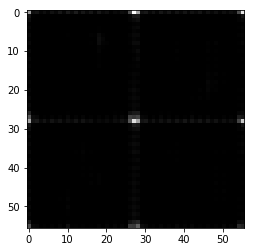

Epoch 1/2... Discriminator Loss: 1.7529... Generator Loss: 0.4443
Epoch 1/2... Discriminator Loss: 1.0043... Generator Loss: 1.1851
Epoch 1/2... Discriminator Loss: 0.9931... Generator Loss: 1.0301
Epoch 1/2... Discriminator Loss: 1.4374... Generator Loss: 0.5968
Epoch 1/2... Discriminator Loss: 1.0573... Generator Loss: 1.5728
Epoch 1/2... Discriminator Loss: 1.5789... Generator Loss: 2.7101
Epoch 1/2... Discriminator Loss: 1.1882... Generator Loss: 1.1065
Epoch 1/2... Discriminator Loss: 1.3264... Generator Loss: 0.7467
Epoch 1/2... Discriminator Loss: 1.4283... Generator Loss: 0.5978
Epoch 1/2... Discriminator Loss: 1.1459... Generator Loss: 1.2639


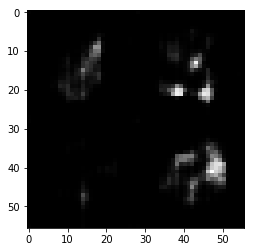

Epoch 1/2... Discriminator Loss: 1.2279... Generator Loss: 1.2355
Epoch 1/2... Discriminator Loss: 1.3363... Generator Loss: 0.8865
Epoch 1/2... Discriminator Loss: 1.1445... Generator Loss: 0.9758
Epoch 1/2... Discriminator Loss: 1.3239... Generator Loss: 0.6903
Epoch 1/2... Discriminator Loss: 1.1940... Generator Loss: 0.7346
Epoch 1/2... Discriminator Loss: 1.4915... Generator Loss: 2.6036
Epoch 1/2... Discriminator Loss: 1.2330... Generator Loss: 0.8471
Epoch 1/2... Discriminator Loss: 1.3121... Generator Loss: 1.4904
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 0.7772
Epoch 1/2... Discriminator Loss: 1.1623... Generator Loss: 0.9125


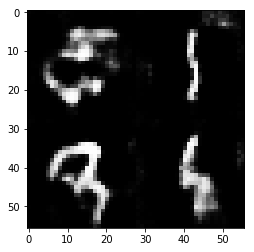

Epoch 1/2... Discriminator Loss: 1.7249... Generator Loss: 2.7945
Epoch 1/2... Discriminator Loss: 1.3981... Generator Loss: 0.5688
Epoch 1/2... Discriminator Loss: 0.9898... Generator Loss: 1.0613
Epoch 1/2... Discriminator Loss: 1.1328... Generator Loss: 1.6006
Epoch 1/2... Discriminator Loss: 0.9927... Generator Loss: 1.5412
Epoch 1/2... Discriminator Loss: 1.1603... Generator Loss: 0.9349
Epoch 1/2... Discriminator Loss: 1.3819... Generator Loss: 1.8746
Epoch 1/2... Discriminator Loss: 0.9530... Generator Loss: 2.5833
Epoch 1/2... Discriminator Loss: 1.1358... Generator Loss: 2.6817
Epoch 1/2... Discriminator Loss: 1.9383... Generator Loss: 0.2997


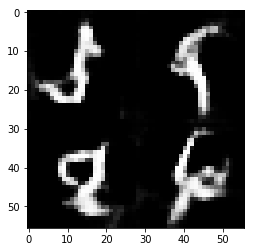

Epoch 1/2... Discriminator Loss: 1.3347... Generator Loss: 0.6009
Epoch 1/2... Discriminator Loss: 1.1748... Generator Loss: 1.0740
Epoch 1/2... Discriminator Loss: 1.3360... Generator Loss: 1.0321
Epoch 1/2... Discriminator Loss: 1.0784... Generator Loss: 1.0905
Epoch 1/2... Discriminator Loss: 1.0414... Generator Loss: 1.0540
Epoch 1/2... Discriminator Loss: 1.9173... Generator Loss: 0.3210
Epoch 1/2... Discriminator Loss: 1.5491... Generator Loss: 0.4819
Epoch 1/2... Discriminator Loss: 1.9335... Generator Loss: 0.3295
Epoch 1/2... Discriminator Loss: 1.2003... Generator Loss: 0.9843
Epoch 1/2... Discriminator Loss: 1.0962... Generator Loss: 1.4499


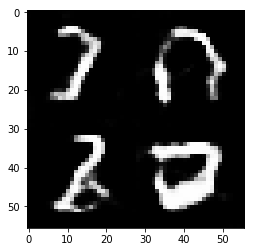

Epoch 1/2... Discriminator Loss: 1.2596... Generator Loss: 1.3641
Epoch 1/2... Discriminator Loss: 1.2637... Generator Loss: 0.6903
Epoch 1/2... Discriminator Loss: 1.7967... Generator Loss: 2.7663
Epoch 1/2... Discriminator Loss: 1.2746... Generator Loss: 0.6599
Epoch 1/2... Discriminator Loss: 1.1548... Generator Loss: 1.9770
Epoch 1/2... Discriminator Loss: 1.9965... Generator Loss: 0.3022
Epoch 1/2... Discriminator Loss: 1.3074... Generator Loss: 0.6653
Epoch 1/2... Discriminator Loss: 1.2818... Generator Loss: 1.4642
Epoch 1/2... Discriminator Loss: 1.1951... Generator Loss: 0.7820
Epoch 1/2... Discriminator Loss: 1.2137... Generator Loss: 0.7386


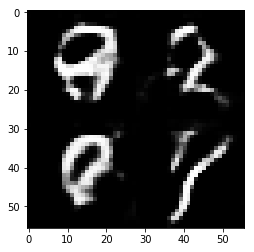

Epoch 1/2... Discriminator Loss: 1.0996... Generator Loss: 1.0820
Epoch 1/2... Discriminator Loss: 1.1322... Generator Loss: 0.8032
Epoch 1/2... Discriminator Loss: 0.9339... Generator Loss: 1.0951
Epoch 1/2... Discriminator Loss: 0.9376... Generator Loss: 1.7458
Epoch 1/2... Discriminator Loss: 1.2675... Generator Loss: 0.6246
Epoch 1/2... Discriminator Loss: 1.3049... Generator Loss: 0.5879
Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 1.4717
Epoch 1/2... Discriminator Loss: 1.5511... Generator Loss: 1.8113
Epoch 1/2... Discriminator Loss: 1.2363... Generator Loss: 1.3558
Epoch 1/2... Discriminator Loss: 1.1418... Generator Loss: 0.9832


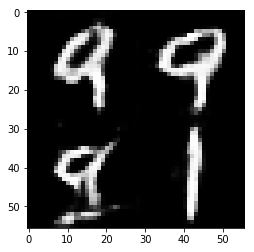

Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 0.9270
Epoch 1/2... Discriminator Loss: 1.4394... Generator Loss: 0.5430
Epoch 1/2... Discriminator Loss: 0.9407... Generator Loss: 1.5934
Epoch 1/2... Discriminator Loss: 1.1091... Generator Loss: 0.9606
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 0.6744
Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.9937
Epoch 1/2... Discriminator Loss: 1.1207... Generator Loss: 1.7132
Epoch 1/2... Discriminator Loss: 1.0616... Generator Loss: 1.0866
Epoch 1/2... Discriminator Loss: 1.1314... Generator Loss: 0.9153
Epoch 1/2... Discriminator Loss: 1.2088... Generator Loss: 0.7009


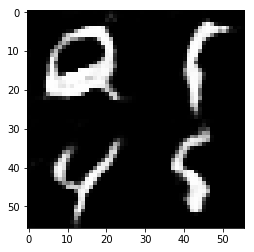

Epoch 1/2... Discriminator Loss: 1.0134... Generator Loss: 1.2733
Epoch 1/2... Discriminator Loss: 0.8132... Generator Loss: 1.5249
Epoch 1/2... Discriminator Loss: 1.6540... Generator Loss: 3.2172
Epoch 1/2... Discriminator Loss: 0.8147... Generator Loss: 2.2789
Epoch 1/2... Discriminator Loss: 0.8643... Generator Loss: 1.9444
Epoch 1/2... Discriminator Loss: 1.6931... Generator Loss: 0.4813
Epoch 1/2... Discriminator Loss: 1.2678... Generator Loss: 1.4018
Epoch 1/2... Discriminator Loss: 1.1199... Generator Loss: 1.6590
Epoch 1/2... Discriminator Loss: 1.0045... Generator Loss: 1.1840
Epoch 1/2... Discriminator Loss: 0.9734... Generator Loss: 1.2914


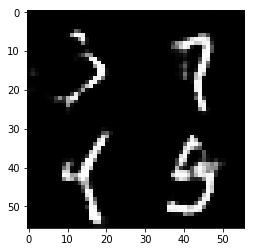

Epoch 1/2... Discriminator Loss: 1.0349... Generator Loss: 1.1501
Epoch 1/2... Discriminator Loss: 1.3500... Generator Loss: 2.3382
Epoch 1/2... Discriminator Loss: 0.8614... Generator Loss: 1.1259
Epoch 2/2... Discriminator Loss: 1.1768... Generator Loss: 0.7779
Epoch 2/2... Discriminator Loss: 0.9142... Generator Loss: 1.2546
Epoch 2/2... Discriminator Loss: 0.9219... Generator Loss: 1.5681
Epoch 2/2... Discriminator Loss: 1.2793... Generator Loss: 0.6243
Epoch 2/2... Discriminator Loss: 1.2539... Generator Loss: 0.6443
Epoch 2/2... Discriminator Loss: 1.1918... Generator Loss: 0.7351
Epoch 2/2... Discriminator Loss: 0.8866... Generator Loss: 1.1326


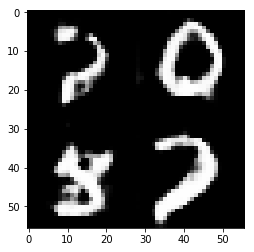

Epoch 2/2... Discriminator Loss: 0.8293... Generator Loss: 1.4991
Epoch 2/2... Discriminator Loss: 1.1386... Generator Loss: 0.8418
Epoch 2/2... Discriminator Loss: 1.0418... Generator Loss: 0.9785
Epoch 2/2... Discriminator Loss: 1.3485... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 1.0124... Generator Loss: 1.1179
Epoch 2/2... Discriminator Loss: 1.0390... Generator Loss: 1.6717
Epoch 2/2... Discriminator Loss: 0.9957... Generator Loss: 1.0595
Epoch 2/2... Discriminator Loss: 1.5183... Generator Loss: 0.4822
Epoch 2/2... Discriminator Loss: 1.0351... Generator Loss: 1.6973
Epoch 2/2... Discriminator Loss: 1.3919... Generator Loss: 0.5225


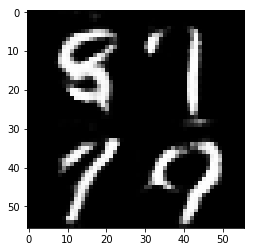

Epoch 2/2... Discriminator Loss: 0.8634... Generator Loss: 1.3380
Epoch 2/2... Discriminator Loss: 0.9544... Generator Loss: 1.5187
Epoch 2/2... Discriminator Loss: 0.9789... Generator Loss: 1.0022
Epoch 2/2... Discriminator Loss: 0.9271... Generator Loss: 1.8585
Epoch 2/2... Discriminator Loss: 1.2570... Generator Loss: 0.6398
Epoch 2/2... Discriminator Loss: 1.3495... Generator Loss: 0.6062
Epoch 2/2... Discriminator Loss: 0.9616... Generator Loss: 1.2217
Epoch 2/2... Discriminator Loss: 1.2681... Generator Loss: 0.6183
Epoch 2/2... Discriminator Loss: 1.0436... Generator Loss: 0.8657
Epoch 2/2... Discriminator Loss: 1.3321... Generator Loss: 0.5823


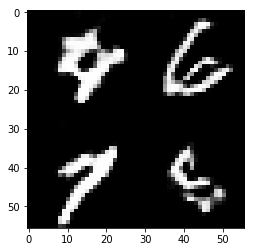

Epoch 2/2... Discriminator Loss: 0.9339... Generator Loss: 1.3108
Epoch 2/2... Discriminator Loss: 3.3530... Generator Loss: 5.1676
Epoch 2/2... Discriminator Loss: 1.1643... Generator Loss: 0.7280
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 1.2084
Epoch 2/2... Discriminator Loss: 1.1636... Generator Loss: 1.9003
Epoch 2/2... Discriminator Loss: 0.9281... Generator Loss: 1.5538
Epoch 2/2... Discriminator Loss: 1.0960... Generator Loss: 0.8140
Epoch 2/2... Discriminator Loss: 0.9850... Generator Loss: 0.9611
Epoch 2/2... Discriminator Loss: 0.8051... Generator Loss: 1.8191
Epoch 2/2... Discriminator Loss: 1.2911... Generator Loss: 3.2512


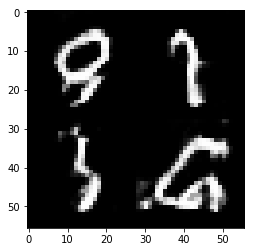

Epoch 2/2... Discriminator Loss: 0.7389... Generator Loss: 1.6402
Epoch 2/2... Discriminator Loss: 1.1921... Generator Loss: 1.9676
Epoch 2/2... Discriminator Loss: 1.4320... Generator Loss: 2.9692
Epoch 2/2... Discriminator Loss: 0.9797... Generator Loss: 1.2370
Epoch 2/2... Discriminator Loss: 1.0195... Generator Loss: 0.8687
Epoch 2/2... Discriminator Loss: 0.6961... Generator Loss: 1.4519
Epoch 2/2... Discriminator Loss: 0.6096... Generator Loss: 1.9118
Epoch 2/2... Discriminator Loss: 0.7187... Generator Loss: 1.3641
Epoch 2/2... Discriminator Loss: 1.0135... Generator Loss: 1.1137
Epoch 2/2... Discriminator Loss: 1.4589... Generator Loss: 0.5242


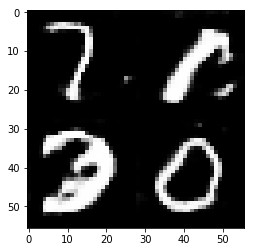

Epoch 2/2... Discriminator Loss: 1.0174... Generator Loss: 0.9332
Epoch 2/2... Discriminator Loss: 0.9822... Generator Loss: 0.9238
Epoch 2/2... Discriminator Loss: 0.7018... Generator Loss: 1.5314
Epoch 2/2... Discriminator Loss: 0.9474... Generator Loss: 1.5947
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 1.1339
Epoch 2/2... Discriminator Loss: 0.9117... Generator Loss: 1.2257
Epoch 2/2... Discriminator Loss: 0.7971... Generator Loss: 1.4430
Epoch 2/2... Discriminator Loss: 1.0140... Generator Loss: 0.9190
Epoch 2/2... Discriminator Loss: 0.8035... Generator Loss: 1.3821
Epoch 2/2... Discriminator Loss: 0.5912... Generator Loss: 2.0518


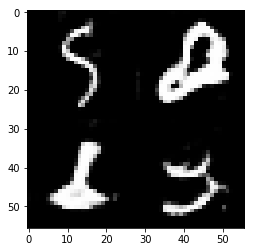

Epoch 2/2... Discriminator Loss: 0.7146... Generator Loss: 1.4876
Epoch 2/2... Discriminator Loss: 0.6098... Generator Loss: 1.8084
Epoch 2/2... Discriminator Loss: 0.5539... Generator Loss: 2.2701
Epoch 2/2... Discriminator Loss: 0.7261... Generator Loss: 2.1349
Epoch 2/2... Discriminator Loss: 0.7896... Generator Loss: 1.2934
Epoch 2/2... Discriminator Loss: 1.8053... Generator Loss: 3.5329
Epoch 2/2... Discriminator Loss: 1.2375... Generator Loss: 0.7462
Epoch 2/2... Discriminator Loss: 0.8529... Generator Loss: 1.2231
Epoch 2/2... Discriminator Loss: 1.2449... Generator Loss: 0.7025
Epoch 2/2... Discriminator Loss: 0.8240... Generator Loss: 1.2521


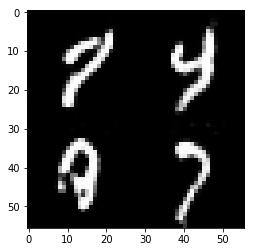

Epoch 2/2... Discriminator Loss: 0.9160... Generator Loss: 1.0491
Epoch 2/2... Discriminator Loss: 1.7880... Generator Loss: 3.8134
Epoch 2/2... Discriminator Loss: 0.9221... Generator Loss: 1.2989
Epoch 2/2... Discriminator Loss: 0.9343... Generator Loss: 1.0180
Epoch 2/2... Discriminator Loss: 0.6103... Generator Loss: 2.1188
Epoch 2/2... Discriminator Loss: 0.6971... Generator Loss: 1.7004
Epoch 2/2... Discriminator Loss: 0.5313... Generator Loss: 2.5692
Epoch 2/2... Discriminator Loss: 0.5728... Generator Loss: 2.2682
Epoch 2/2... Discriminator Loss: 1.1615... Generator Loss: 0.7014
Epoch 2/2... Discriminator Loss: 1.1518... Generator Loss: 0.8434


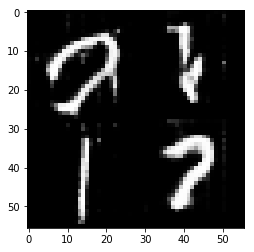

Epoch 2/2... Discriminator Loss: 1.0619... Generator Loss: 0.9304
Epoch 2/2... Discriminator Loss: 0.7775... Generator Loss: 1.6005
Epoch 2/2... Discriminator Loss: 1.0367... Generator Loss: 0.9767
Epoch 2/2... Discriminator Loss: 0.7246... Generator Loss: 1.4892
Epoch 2/2... Discriminator Loss: 0.6211... Generator Loss: 1.8312
Epoch 2/2... Discriminator Loss: 0.6319... Generator Loss: 1.6710
Epoch 2/2... Discriminator Loss: 0.7152... Generator Loss: 1.5759
Epoch 2/2... Discriminator Loss: 1.9595... Generator Loss: 0.5513
Epoch 2/2... Discriminator Loss: 0.6775... Generator Loss: 1.8199
Epoch 2/2... Discriminator Loss: 1.3110... Generator Loss: 0.6533


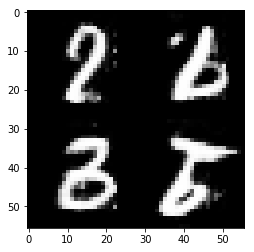

Epoch 2/2... Discriminator Loss: 1.0259... Generator Loss: 1.0482
Epoch 2/2... Discriminator Loss: 0.8939... Generator Loss: 1.0861
Epoch 2/2... Discriminator Loss: 0.9060... Generator Loss: 1.1876
Epoch 2/2... Discriminator Loss: 0.6700... Generator Loss: 1.6244
Epoch 2/2... Discriminator Loss: 0.7010... Generator Loss: 2.6723
Epoch 2/2... Discriminator Loss: 0.6421... Generator Loss: 1.7636


In [ ]:
batch_size = 64 #(~16 to 64); the lower the batch size, the lower the learning rate
z_dim = 100 # 100/128 is a reasonably good choice here
learning_rate = 0.0004 # Should be between 0.0001 and 0.0008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

3
Epoch 1/1... Discriminator Loss: 0.0731... Generator Loss: 8.7092
Epoch 1/1... Discriminator Loss: 0.1109... Generator Loss: 3.9261
Epoch 1/1... Discriminator Loss: 0.1250... Generator Loss: 3.3742
Epoch 1/1... Discriminator Loss: 0.0680... Generator Loss: 8.8365
Epoch 1/1... Discriminator Loss: 0.2421... Generator Loss: 1.9313
Epoch 1/1... Discriminator Loss: 0.3360... Generator Loss: 3.8876
Epoch 1/1... Discriminator Loss: 0.3518... Generator Loss: 2.2692
Epoch 1/1... Discriminator Loss: 0.2618... Generator Loss: 2.3008
Epoch 1/1... Discriminator Loss: 4.6557... Generator Loss: 15.1087
Epoch 1/1... Discriminator Loss: 0.2726... Generator Loss: 3.2128


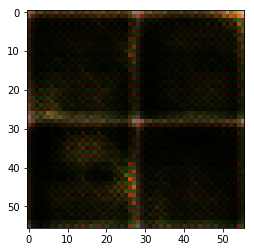

Epoch 1/1... Discriminator Loss: 0.3669... Generator Loss: 2.3809
Epoch 1/1... Discriminator Loss: 0.4033... Generator Loss: 2.6251
Epoch 1/1... Discriminator Loss: 0.4406... Generator Loss: 1.4594
Epoch 1/1... Discriminator Loss: 0.0318... Generator Loss: 4.9086
Epoch 1/1... Discriminator Loss: 0.1213... Generator Loss: 3.1455
Epoch 1/1... Discriminator Loss: 0.0792... Generator Loss: 6.8987
Epoch 1/1... Discriminator Loss: 0.3732... Generator Loss: 2.7522
Epoch 1/1... Discriminator Loss: 0.0699... Generator Loss: 5.1696
Epoch 1/1... Discriminator Loss: 0.8021... Generator Loss: 1.9374
Epoch 1/1... Discriminator Loss: 1.5292... Generator Loss: 7.3912


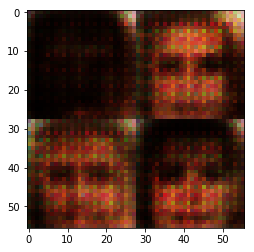

Epoch 1/1... Discriminator Loss: 0.1914... Generator Loss: 3.7792
Epoch 1/1... Discriminator Loss: 0.2594... Generator Loss: 2.2710
Epoch 1/1... Discriminator Loss: 2.3911... Generator Loss: 12.6408
Epoch 1/1... Discriminator Loss: 0.1811... Generator Loss: 2.7139
Epoch 1/1... Discriminator Loss: 4.4950... Generator Loss: 0.0197
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 4.8354
Epoch 1/1... Discriminator Loss: 0.1049... Generator Loss: 6.1171
Epoch 1/1... Discriminator Loss: 0.3775... Generator Loss: 2.8579
Epoch 1/1... Discriminator Loss: 0.3191... Generator Loss: 1.8632
Epoch 1/1... Discriminator Loss: 0.7037... Generator Loss: 8.1172


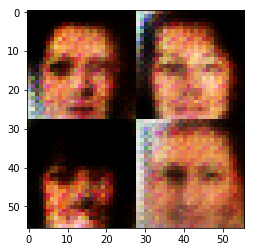

Epoch 1/1... Discriminator Loss: 0.0857... Generator Loss: 3.3145
Epoch 1/1... Discriminator Loss: 0.5091... Generator Loss: 1.3660
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 0.2558... Generator Loss: 6.8963
Epoch 1/1... Discriminator Loss: 0.2358... Generator Loss: 2.3786
Epoch 1/1... Discriminator Loss: 0.5717... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 0.1174... Generator Loss: 3.1267
Epoch 1/1... Discriminator Loss: 0.1239... Generator Loss: 3.3247
Epoch 1/1... Discriminator Loss: 0.6460... Generator Loss: 6.9341
Epoch 1/1... Discriminator Loss: 0.4751... Generator Loss: 1.2411


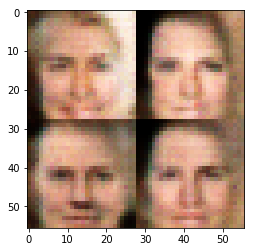

Epoch 1/1... Discriminator Loss: 0.2203... Generator Loss: 2.1870
Epoch 1/1... Discriminator Loss: 0.0655... Generator Loss: 3.7782
Epoch 1/1... Discriminator Loss: 0.2845... Generator Loss: 1.8737
Epoch 1/1... Discriminator Loss: 1.7914... Generator Loss: 3.7402
Epoch 1/1... Discriminator Loss: 0.7058... Generator Loss: 1.0159
Epoch 1/1... Discriminator Loss: 0.2244... Generator Loss: 2.7009
Epoch 1/1... Discriminator Loss: 0.1623... Generator Loss: 2.3905
Epoch 1/1... Discriminator Loss: 0.2776... Generator Loss: 1.9091
Epoch 1/1... Discriminator Loss: 0.1198... Generator Loss: 3.0780
Epoch 1/1... Discriminator Loss: 0.3798... Generator Loss: 1.5097


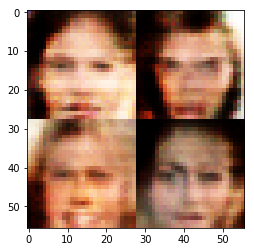

Epoch 1/1... Discriminator Loss: 0.1448... Generator Loss: 2.8255
Epoch 1/1... Discriminator Loss: 0.5871... Generator Loss: 1.0067
Epoch 1/1... Discriminator Loss: 0.1464... Generator Loss: 2.6780
Epoch 1/1... Discriminator Loss: 0.6741... Generator Loss: 0.9966
Epoch 1/1... Discriminator Loss: 0.0885... Generator Loss: 3.6325
Epoch 1/1... Discriminator Loss: 0.1099... Generator Loss: 4.6206
Epoch 1/1... Discriminator Loss: 0.1113... Generator Loss: 4.0034
Epoch 1/1... Discriminator Loss: 0.1659... Generator Loss: 2.4089
Epoch 1/1... Discriminator Loss: 2.2489... Generator Loss: 9.6836
Epoch 1/1... Discriminator Loss: 0.2990... Generator Loss: 1.9390


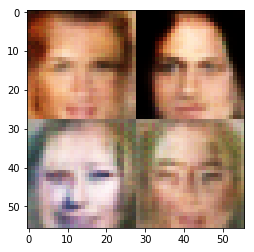

Epoch 1/1... Discriminator Loss: 0.0577... Generator Loss: 4.1097
Epoch 1/1... Discriminator Loss: 0.1182... Generator Loss: 5.6879
Epoch 1/1... Discriminator Loss: 0.0619... Generator Loss: 5.2315
Epoch 1/1... Discriminator Loss: 0.7823... Generator Loss: 1.1026
Epoch 1/1... Discriminator Loss: 0.1994... Generator Loss: 5.5551
Epoch 1/1... Discriminator Loss: 0.4625... Generator Loss: 1.3751
Epoch 1/1... Discriminator Loss: 0.1345... Generator Loss: 3.4421
Epoch 1/1... Discriminator Loss: 0.1831... Generator Loss: 5.7802
Epoch 1/1... Discriminator Loss: 0.0855... Generator Loss: 7.1495
Epoch 1/1... Discriminator Loss: 0.1109... Generator Loss: 3.0443


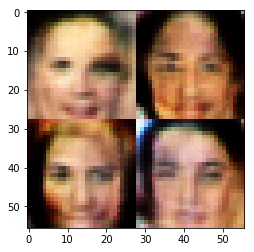

Epoch 1/1... Discriminator Loss: 0.0557... Generator Loss: 4.2328
Epoch 1/1... Discriminator Loss: 0.0523... Generator Loss: 5.6528
Epoch 1/1... Discriminator Loss: 0.3752... Generator Loss: 10.0669
Epoch 1/1... Discriminator Loss: 0.1725... Generator Loss: 2.5879
Epoch 1/1... Discriminator Loss: 6.7633... Generator Loss: 8.9572
Epoch 1/1... Discriminator Loss: 0.5929... Generator Loss: 1.7208
Epoch 1/1... Discriminator Loss: 1.1684... Generator Loss: 0.5401
Epoch 1/1... Discriminator Loss: 2.0512... Generator Loss: 0.2207
Epoch 1/1... Discriminator Loss: 0.3490... Generator Loss: 2.5407
Epoch 1/1... Discriminator Loss: 1.8449... Generator Loss: 0.3011


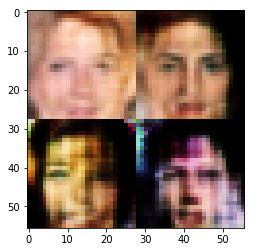

Epoch 1/1... Discriminator Loss: 0.9090... Generator Loss: 0.6958
Epoch 1/1... Discriminator Loss: 0.2841... Generator Loss: 1.9634
Epoch 1/1... Discriminator Loss: 0.3810... Generator Loss: 1.5547
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.5965
Epoch 1/1... Discriminator Loss: 0.1805... Generator Loss: 3.3677
Epoch 1/1... Discriminator Loss: 0.0678... Generator Loss: 6.7549
Epoch 1/1... Discriminator Loss: 0.3193... Generator Loss: 1.8652
Epoch 1/1... Discriminator Loss: 0.3999... Generator Loss: 1.6268
Epoch 1/1... Discriminator Loss: 0.0632... Generator Loss: 5.8262
Epoch 1/1... Discriminator Loss: 0.4299... Generator Loss: 1.4651


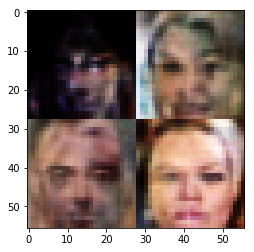

Epoch 1/1... Discriminator Loss: 0.2821... Generator Loss: 3.4101
Epoch 1/1... Discriminator Loss: 0.0874... Generator Loss: 7.1569
Epoch 1/1... Discriminator Loss: 0.0923... Generator Loss: 3.5148
Epoch 1/1... Discriminator Loss: 0.0850... Generator Loss: 4.6752
Epoch 1/1... Discriminator Loss: 0.0544... Generator Loss: 4.0534
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 6.7621
Epoch 1/1... Discriminator Loss: 0.4262... Generator Loss: 1.5570
Epoch 1/1... Discriminator Loss: 0.0645... Generator Loss: 4.0895
Epoch 1/1... Discriminator Loss: 0.5480... Generator Loss: 1.3182
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 2.5390


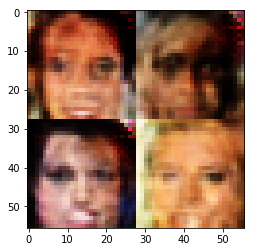

Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.5221
Epoch 1/1... Discriminator Loss: 0.5985... Generator Loss: 1.2224
Epoch 1/1... Discriminator Loss: 0.1719... Generator Loss: 3.1023
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 0.3143... Generator Loss: 3.7455
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.4933
Epoch 1/1... Discriminator Loss: 0.2538... Generator Loss: 3.7496
Epoch 1/1... Discriminator Loss: 0.8838... Generator Loss: 0.7791
Epoch 1/1... Discriminator Loss: 0.5554... Generator Loss: 1.4734
Epoch 1/1... Discriminator Loss: 0.3667... Generator Loss: 1.6983


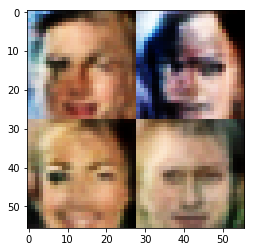

Epoch 1/1... Discriminator Loss: 0.2225... Generator Loss: 2.4333
Epoch 1/1... Discriminator Loss: 0.1463... Generator Loss: 2.9253
Epoch 1/1... Discriminator Loss: 0.1200... Generator Loss: 5.3923
Epoch 1/1... Discriminator Loss: 0.0782... Generator Loss: 3.9958
Epoch 1/1... Discriminator Loss: 0.0512... Generator Loss: 4.9185
Epoch 1/1... Discriminator Loss: 0.0382... Generator Loss: 4.9088
Epoch 1/1... Discriminator Loss: 0.0766... Generator Loss: 3.5658
Epoch 1/1... Discriminator Loss: 0.0753... Generator Loss: 4.4358
Epoch 1/1... Discriminator Loss: 0.2297... Generator Loss: 2.0919
Epoch 1/1... Discriminator Loss: 1.5907... Generator Loss: 0.4908


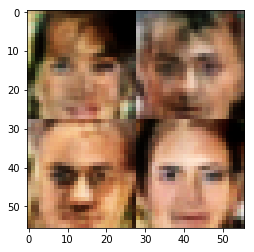

Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 1.2846
Epoch 1/1... Discriminator Loss: 0.9238... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.0283
Epoch 1/1... Discriminator Loss: 0.7787... Generator Loss: 1.4506
Epoch 1/1... Discriminator Loss: 0.7518... Generator Loss: 1.0517
Epoch 1/1... Discriminator Loss: 0.7459... Generator Loss: 1.0207
Epoch 1/1... Discriminator Loss: 0.5738... Generator Loss: 2.0749
Epoch 1/1... Discriminator Loss: 0.5269... Generator Loss: 2.8553
Epoch 1/1... Discriminator Loss: 0.2545... Generator Loss: 2.2505
Epoch 1/1... Discriminator Loss: 0.9896... Generator Loss: 0.6703


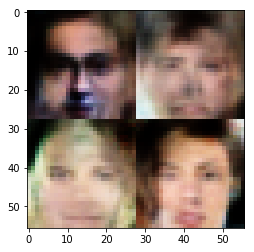

Epoch 1/1... Discriminator Loss: 1.6142... Generator Loss: 4.7604
Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 5.7385
Epoch 1/1... Discriminator Loss: 0.5118... Generator Loss: 4.0994
Epoch 1/1... Discriminator Loss: 0.1921... Generator Loss: 2.8265
Epoch 1/1... Discriminator Loss: 1.2452... Generator Loss: 8.8678
Epoch 1/1... Discriminator Loss: 0.2837... Generator Loss: 2.4393
Epoch 1/1... Discriminator Loss: 0.1131... Generator Loss: 4.3036
Epoch 1/1... Discriminator Loss: 0.0533... Generator Loss: 4.7376
Epoch 1/1... Discriminator Loss: 0.1999... Generator Loss: 2.1607
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 5.5835


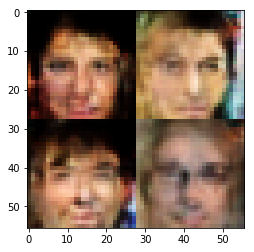

Epoch 1/1... Discriminator Loss: 0.4435... Generator Loss: 1.5427
Epoch 1/1... Discriminator Loss: 0.1885... Generator Loss: 2.6362
Epoch 1/1... Discriminator Loss: 0.0964... Generator Loss: 3.2725
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 1.1045
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.0021... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 0.4699... Generator Loss: 1.5532
Epoch 1/1... Discriminator Loss: 0.3349... Generator Loss: 4.0517
Epoch 1/1... Discriminator Loss: 1.5173... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.6831


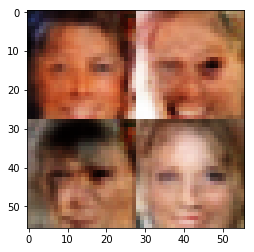

Epoch 1/1... Discriminator Loss: 0.5143... Generator Loss: 1.6641
Epoch 1/1... Discriminator Loss: 0.4360... Generator Loss: 1.9957
Epoch 1/1... Discriminator Loss: 0.1623... Generator Loss: 2.6321
Epoch 1/1... Discriminator Loss: 0.1578... Generator Loss: 2.5731
Epoch 1/1... Discriminator Loss: 0.0725... Generator Loss: 3.8513
Epoch 1/1... Discriminator Loss: 0.3594... Generator Loss: 1.8112
Epoch 1/1... Discriminator Loss: 0.0880... Generator Loss: 4.6950
Epoch 1/1... Discriminator Loss: 0.0710... Generator Loss: 4.3449


In [55]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.